In [188]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import LineString

# 1º Etapa - Criar os obstaculos e os pontos iniciais e finais

Essa etapa consiste em criar um mapa de proporção MxN, capaz de alocar todos os obstaculos e os pontos iniciais e finais;

Observações:

- Todos os obstaculos devem ser gerados automaticamente
- Todos os obstaculos devem estar dentro do espaço do mapa (Caso aconteça, sortear uma nova posição)
- Nenhum obstaculo deve sobrepor o outro (Caso aconteça, sortear uma nova posição)

- para coordenadas, seguir a seguinte ordem para os valores em um array

0-----1 <br>
2-----3


# Função para validar coordenada

Essa função tem como objetivo receber um ponto e verificar se esse ponto está compreendido dentro de um retangulo de coordenadas.

A função é útil para os seguintes casos:
- Verificar se o ponto está dentro do mapa;
- Verificar se um ponto de um obstaculo não sobrepoe outro obstaculo;

In [189]:
def coordenada_valida(ponto, x_min_mapa, y_min_mapa, x_max_mapa, y_max_mapa):
    '''
    ponto: [x,y]
    x_min: Coordenada x minima do mapa
    y_min: Coordenada y minima do mapa
    x_max: Coordenada x máxima do mapa
    y_max: Coordenada y máxima do mapa
    
    retorna True caso seja no intervalo e False caso a coordenada seja inválida
    
    '''
    return x_min_mapa <= ponto[0] <= x_max_mapa and y_min_mapa <= ponto[1] <= y_max_mapa   

# Função Obstaculo Sobreposto

Essa função tem como objetivo verificar se algum ponto (x,y) do novo obstaculo criado está dentro de um obstaculo criado anteriormente.

In [190]:
def obstaculo_sobreposto(novo_obstaculo, obstaculos):
    '''
    novo_obstaculo: lista com os pontos do novo obstaculo -> [[x,y], [x,y], [x,y], [x,y]]
    obstaculos: lista com todos os obstaculos já criados -> [[[x,y], [x,y], [x,y], [x,y]] , [[x,y], [x,y], [x,y], [x,y]]]
    
    
    retornar True se os obstaculos se sobrepoe. False caso não se sobrepoe.
    '''
    
    for obstaculo in obstaculos:
        # obstaculo -> [[x,y], [x,y], [x,y], [x,y]]
        for ponto in novo_obstaculo:
            # ponto [x,y]
            # A função coordenada_valida retorna true se o ponto estiver dentro do "mapa".
            # Nesse caso, se o ponto do novo obstaculo estiver dentro do mapa(coordenadas do obstaculo anterior)
            # significa dizer que o obstaculo sobrepoe o outro
            if coordenada_valida(ponto, obstaculo[0][0], obstaculo[0][1], obstaculo[3][0], obstaculo[3][1]):
                # obstaculos se sobrepoe
                return True
        
    return False

# Criando o Mapa

Essa função deve criar:

- O espaço do mapa;
- Os pontos de início e fim;
- Os obstaculos, que são gerados aleatoriamente;

In [242]:
def criar_mapa(tam_obstaculo, qtd_obstaculos, coordenada_inicial, coordenada_final):
    '''
    tam_obstaculo: valor que corresponde a proporção do obstaculo. ex: 10 (obstaculo 10x10)
    qtd_obstaculos: quantidade de obstaculos a serem gerados
    coordenada_inicial: coordenada x,y do ponto de partida
    coordenada_final: coordenada x,y do ponto final
    '''
    try:
        
        max_mapa = qtd_obstaculos * tam_obstaculo + 10
        
        mapa = np.array([[0,0], [0, max_mapa], [max_mapa, 0], [max_mapa, max_mapa]])
        
        # verificar se as coordenadas de inicio estão dentro do mapa
        if not coordenada_valida(coordenada_inicial, mapa[0][0], mapa[0][1], mapa[3][0], mapa[3][1]):
            raise ValueError('Coordenada incial inválida')
            
        # verificar se as coordenadas final estão dentro do mapa
        if not coordenada_valida(coordenada_final, mapa[0][0], mapa[0][1], mapa[3][0], mapa[3][1]):
            raise ValueError('Coordenada Final inválida')
            
        '''
        Criar obstaculos 
        
        - Sortear um ponto x,y com tamanho maximo e minimo compreendido no tamanho do mapa
        - verificar se esse ponto com o tamanho do obstaculo nao ultrapassa o espaço do mapa
        '''    
        
        x = 0
        contador = 0
        obstaculos = []
        while x < qtd_obstaculos:
            x_min_obstaculo = randint(mapa[0][0], mapa[3][1])
            y_min_obstaculo = randint(mapa[0][0], mapa[3][1])
            
            ponto1 = [x_min_obstaculo, y_min_obstaculo]
            ponto2 = [x_min_obstaculo, y_min_obstaculo + tam_obstaculo]
            ponto3 = [x_min_obstaculo + tam_obstaculo, y_min_obstaculo]
            ponto4 = [x_min_obstaculo + tam_obstaculo, y_min_obstaculo + tam_obstaculo]
            
            # Verificar se algum ponto do obstaculo ultrapassa o mapa
            # caso ultrapassar, essa repetição será ignorada (continue) e será gerado uma nova posição para o retangulo
            if not coordenada_valida(ponto2, mapa[0][0], mapa[0][1], mapa[3][0], mapa[3][1]):
                continue
                
            if not coordenada_valida(ponto3, mapa[0][0], mapa[0][1], mapa[3][0], mapa[3][1]):
                continue
                
            if not coordenada_valida(ponto4, mapa[0][0], mapa[0][1], mapa[3][0], mapa[3][1]):
                continue
                
            # verificar se algum obstaculo sobrepoe outro já existente
            resultado_sobreposto = obstaculo_sobreposto([ponto1, ponto2, ponto3, ponto4], obstaculos)
            
            if resultado_sobreposto and contador < 50:
                contador += 1
                continue
                
            if contador == 50:
                print('Obstaculos sobrepostos')
            
            # pontos do obstaculo válido, criar lista com todos os pontos
            obstaculos.append([ponto1, ponto2, ponto3, ponto4])
            x += 1
            
        resultados = {}
        resultados['mapa'] = mapa
        resultados['coordenada_inicial'] = coordenada_inicial
        resultados['coordenada_final'] = coordenada_final
        resultados['obstaculos'] = obstaculos
        
        return resultados
    except ValueError as e:
        print(f'Error: {e}')

In [294]:
tam_obstaculo = 10
random = 4
coordenada_inicial = [1, 1]

valor_coordenada_final = random * tam_obstaculo + 10
coordenada_final = [valor_coordenada_final - 1, valor_coordenada_final - 1]

In [295]:
mapa = criar_mapa(tam_obstaculo, random, coordenada_inicial, coordenada_final)
mapa

{'mapa': array([[ 0,  0],
        [ 0, 50],
        [50,  0],
        [50, 50]]),
 'coordenada_inicial': [1, 1],
 'coordenada_final': [49, 49],
 'obstaculos': [[[17, 22], [17, 32], [27, 22], [27, 32]],
  [[31, 36], [31, 46], [41, 36], [41, 46]],
  [[35, 19], [35, 29], [45, 19], [45, 29]],
  [[1, 28], [1, 38], [11, 28], [11, 38]]]}

# Plotando o Mapa

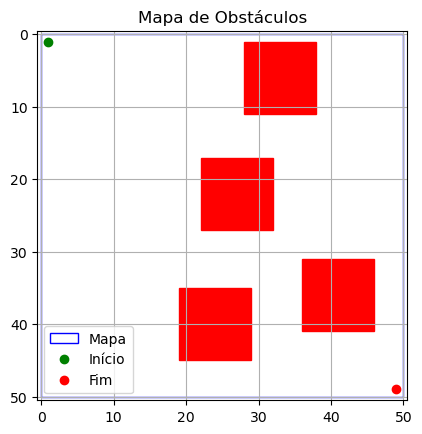

In [296]:
# Criando um retângulo
retangulo_mapa = patches.Rectangle((mapa['mapa'][0][1], mapa['mapa'][0][0]), mapa['mapa'][3][1], mapa['mapa'][3][0], edgecolor='blue', facecolor='none', label='Mapa')

fig, ax = plt.subplots()

# Obstaculos
for obstaculo in mapa['obstaculos']: 
    #obstaculos [[12, 4], [12, 14], [22, 4], [22, 14]]
    retangulo_obstaculo = patches.Rectangle((obstaculo[0][1], obstaculo[0][0]), obstaculo[3][1] - obstaculo[0][1], obstaculo[3][0] - obstaculo[0][0], edgecolor='red', facecolor='red')
    ax.add_patch(retangulo_obstaculo)


# limite do plot
plt.xlim(mapa['mapa'][0][0] - 0.5, mapa['mapa'][3][1] + 0.5)
plt.ylim(mapa['mapa'][0][0] - 0.5, mapa['mapa'][3][0] + 0.5)

ax.add_patch(retangulo_mapa) # adicionando Mapa

# Adicionar os pontos de início e fim
inicio = tuple(mapa['coordenada_inicial'])
fim = tuple(mapa['coordenada_final'])
plt.plot(*inicio, 'go', label='Início')
plt.plot(*fim, 'ro', label='Fim')

plt.gca().invert_yaxis() # Inverte o eixo Y (Para ficar parecido com o crescimento de uma matriz

# Adicionando legendas
plt.legend()

plt.title('Mapa de Obstáculos')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Mantém a proporção dos eixos

# Exibindo o gráfico
plt.show()

# Determinar se os segmentos de retas entre os pontos se interceptam

Essa etapa consiste em verificar se um segmento do caminho entre o inicial e o final choca com o segmento de reta de um obstaculo. Se isso acontecer, siginifica que o caminho encontrado atualmente está atravessando algum obstaculo.

In [297]:
mapa

{'mapa': array([[ 0,  0],
        [ 0, 50],
        [50,  0],
        [50, 50]]),
 'coordenada_inicial': [1, 1],
 'coordenada_final': [49, 49],
 'obstaculos': [[[17, 22], [17, 32], [27, 22], [27, 32]],
  [[31, 36], [31, 46], [41, 36], [41, 46]],
  [[35, 19], [35, 29], [45, 19], [45, 29]],
  [[1, 28], [1, 38], [11, 28], [11, 38]]]}

A função de produto cruzado é importante na etapa de identificação de intercepção de retas.
Ela é util para identificar as extremidades de um segmento estão em lados diferentes em relação a outro segmento.

In [298]:
'''
    Calcula a distância euclidiana entre dois pontos.
'''
def distancia_euclidiana(ponto1, ponto2):
    '''
        ponto1: [x,y]
        ponto2: [x,y]
    
        Retorna a distância euclidiana entre os dois pontos.
    '''
    x1, y1 = ponto1
    x2, y2 = ponto2
    
    distancia = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    
    return distancia

In [299]:
'''
Recebe um segmento de reta e uma lista de obstaculos

Deve verificar para cada segmento de reta possivel em cada obstaculo se o mesmo 
se intercepta com o segmento do caminho.
'''
def listar_intersecoes(segmento_caminho, obstaculos):
    '''
    segmento_caminho: [[x,y], [x,y]]
    obstaculos: [[[x, y], [x, y], [x, y], [x, y]], [[x, y], [x, y], [x, y], [x, y]]]
    
    
    retorna uma lista com os pontos de interseção e uma lista com os segmentos que houve interseção
    '''
    segmento_caminho_linestring = LineString([segmento_caminho[0], segmento_caminho[1]])
    intersecoes = []
    segmentos_com_intersecoes = []
    
    for obstaculo in obstaculos:
        '''
        obstaculo = [[40, 46], [40, 56], [50, 46], [50, 56]]
        '''
        obstaculo_linestrings = []
        obstaculo_linestrings.append(LineString([obstaculo[0], obstaculo[1]]))
        obstaculo_linestrings.append(LineString([obstaculo[0], obstaculo[2]]))
        obstaculo_linestrings.append(LineString([obstaculo[1], obstaculo[3]]))
        obstaculo_linestrings.append(LineString([obstaculo[2], obstaculo[3]]))
        
        for linestring in obstaculo_linestrings:
            intersecao = segmento_caminho_linestring.intersection(linestring)
            if not intersecao.is_empty:
                intersecoes.append([intersecao.x, intersecao.y])
                segmentos_com_intersecoes.append(list(linestring.coords))
                
    return intersecoes, segmentos_com_intersecoes

###  Etapa que devemos fazer para a criação do caminho
0 - Criar uma lista de segmentos para os segmentos do caminho <br>
1 - Traçar um segmento de reta do ponto atual para o ponto final (no inicio, o ponto atual é o inicio do caminho) <br>
3 - Verificar se esse segmento de reta possui interseções com algum segmento de reta dos obstaculos <br>
4 - A função retorna o ponto de interseção e qual o segmento que houve intersecção <br>
5 - Descobrir qual foi o primeiro segmento de reta que houve choque (será o segmento com a menor distância euclidiana do ponto atual) <br>
6 - Adicionar no caminho um segmento de reta do ponto atual até o ponto de interseção do segmento mais próximo <br>
6.1 - Ponto atual se torna o ponto de interseção <br>
7 - Descobrir qual dos vertices do segmento mais próximo possui distancia euclidiana menor em relação ao ponto final <br>
8 - Adicionar ao caminho o segmento de reta do ponto de interseção até o vertice daquele segmento de reta do obstaculo. <br>
9 - ponto atual se torna o vertice do obstaculo <br>
10 - Repetir isso até que o ponto atual seja igual ao ponto final <br>

In [300]:
# Criar caminho entre o ponto inicial e o ponto final
caminho_completo = []
posicao_atual = inicio
inicio = mapa['coordenada_inicial']
fim = mapa['coordenada_final']

while posicao_atual != fim:
    
    intersecoes, segmentos_com_intersecoes = listar_intersecoes([posicao_atual, fim], mapa['obstaculos'])
    
    if intersecoes:
        
        primeiro_ponto_intersecao = None
        primeiro_segmento_intersecao = None
        ultima_distancia = None

        # Decobrir qual foi o primeiro ponto que houve choque
        for i in range(len(intersecoes)):
            # i = 0,1,2,3...
            distancia = distancia_euclidiana(intersecoes[i], posicao_atual)
    
            if primeiro_ponto_intersecao is None:
                primeiro_ponto_intersecao = intersecoes[i]
                primeiro_segmento_intersecao = segmentos_com_intersecoes[i]
                ultima_distancia = distancia
            elif distancia < ultima_distancia:
                primeiro_ponto_intersecao = intersecoes[i]
                primeiro_segmento_intersecao = segmentos_com_intersecoes[i]
                ultima_distancia = distancia
    
        # Adicionar no caminho um segmento de reta do ponto atual até o ponto de interseção do segmento mais próximo
        caminho_completo.append([posicao_atual, primeiro_ponto_intersecao])
    
        # Ponto atual se torna o ponto de interseção
        posicao_atual = primeiro_ponto_intersecao
    
        # Descobrir qual dos vertices do segmento mais próximo possui distancia euclidiana menor em relação ao ponto final
        distancia_vertice1 = distancia_euclidiana(primeiro_segmento_intersecao[0], fim)
        distancia_vertice2 = distancia_euclidiana(primeiro_segmento_intersecao[1], fim)

        vertice_mais_proximo = None

        if distancia_vertice1 < distancia_vertice2:
            vertice_mais_proximo = primeiro_segmento_intersecao[0]
        else:
            vertice_mais_proximo = primeiro_segmento_intersecao[1]
        
        # Adicionar ao caminho o segmento de reta do ponto de interseção até o vertice daquele segmento de reta do obstaculo.
        caminho_completo.append([posicao_atual, vertice_mais_proximo])

        '''
        Nessa etapa, quando eu vou para o vertice de um segmento e poteriormente encontro os vertices de segmentos que provocam interseções,
        o vertice que eu estou será considerado, Portanto, eu preciso encontrar o vertice e depois sair dele (andar uma posição para sair do vertice)

        Para isso, devo saber em que direção eu preciso ir (cima, baixo, esquerda ou direita)

        se eu subtrair o x,y do vertice mais proximo pela posição atual, as possibilidades serão:

        x = 0 e y > 0 -> Para baixo
        x = 0 e y < 0 -> Para cima
        x > 0 e y = 0 -> Para a direita
        x < 0 e y = 0 -> Para a esquerda

        para cada um desses casos, eu devo aumentar ou diminuir 1 unidade em uma direção, a depender da condição
        '''

        valor_x = vertice_mais_proximo[0] - posicao_atual[0]
        valor_y = vertice_mais_proximo[1] - posicao_atual[1]
    
        if valor_y > 0:
            desvio = [vertice_mais_proximo[0], vertice_mais_proximo[1] + 1]
            caminho_completo.append([posicao_atual, desvio])
            posicao_atual = desvio
        elif valor_y < 0:
            desvio = [vertice_mais_proximo[0], vertice_mais_proximo[1] - 1]
            caminho_completo.append([posicao_atual, desvio])
            posicao_atual = desvio
        elif valor_x > 0:
            desvio = [vertice_mais_proximo[0] + 1, vertice_mais_proximo[1]]
            caminho_completo.append([posicao_atual, desvio])
            posicao_atual = desvio
        else:
            desvio = [vertice_mais_proximo[0] - 1, vertice_mais_proximo[1]]
            caminho_completo.append([posicao_atual, desvio])
            posicao_atual = desvio
    else:
        caminho_completo.append([posicao_atual, fim])
        posicao_atual = fim

In [301]:
caminho_completo

[[(1, 1), [22.0, 22.0]],
 [[22.0, 22.0], (27.0, 22.0)],
 [[22.0, 22.0], [28.0, 22.0]],
 [[28.0, 22.0], [38.888888888888886, 36.0]],
 [[38.888888888888886, 36.0], (41.0, 36.0)],
 [[38.888888888888886, 36.0], [42.0, 36.0]],
 [[42.0, 36.0], [49, 49]]]

# Plotar caminho no mapa

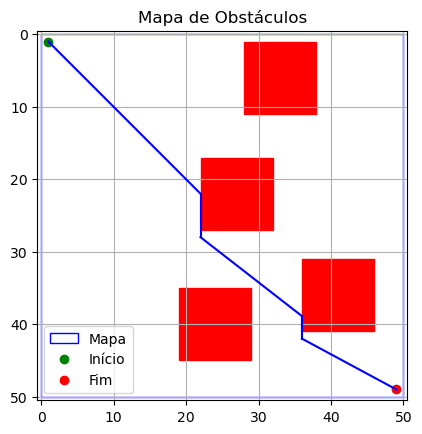

In [302]:
# Criando um retângulo
retangulo_mapa = patches.Rectangle((mapa['mapa'][0][1], mapa['mapa'][0][0]), mapa['mapa'][3][1], mapa['mapa'][3][0], edgecolor='blue', facecolor='none', label='Mapa')

fig, ax = plt.subplots()

# Obstaculos
for obstaculo in mapa['obstaculos']: 
    #obstaculos [[12, 4], [12, 14], [22, 4], [22, 14]]
    retangulo_obstaculo = patches.Rectangle((obstaculo[0][1], obstaculo[0][0]), obstaculo[3][1] - obstaculo[0][1], obstaculo[3][0] - obstaculo[0][0], edgecolor='red', facecolor='red')
    ax.add_patch(retangulo_obstaculo)


# limite do plot
plt.xlim(mapa['mapa'][0][0] - 0.5, mapa['mapa'][3][1] + 0.5)
plt.ylim(mapa['mapa'][0][0] - 0.5, mapa['mapa'][3][0] + 0.5)

ax.add_patch(retangulo_mapa) # adicionando Mapa

# Adicionar os pontos de início e fim
inicio = tuple(mapa['coordenada_inicial'])
fim = tuple(mapa['coordenada_final'])
plt.plot(*inicio, 'go', label='Início')
plt.plot(*fim, 'ro', label='Fim')



# adicionar o caminho
for segmento in caminho_completo:
    # segmento = [[1, 1], [9.0, 9.0]]
    
    x1 = segmento[0][1] 
    x2 = segmento[1][1]
    y1 = segmento[0][0]
    y2 = segmento[1][0]
    
    
    plt.plot([x1, x2], [y1, y2], color='blue')


plt.gca().invert_yaxis() # Inverte o eixo Y (Para ficar parecido com o crescimento de uma matriz

# Adicionando legendas
plt.legend()

plt.title('Mapa de Obstáculos')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Mantém a proporção dos eixos

plt.show()